In [17]:
import pandas as pd
import seaborn as sns

In [18]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import RobustScaler

In [19]:
# seaborn 한글 안깨지게
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

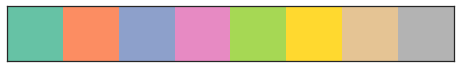

In [20]:
# seaborn palette -> 찾아보고 마음에 드는걸로 바꿔도 괜찮 !
palette = sns.color_palette('Set2') # palette 이름 () 안에 넣어주고
sns.palplot(palette) # 색상 확인
sns.set_palette('Set2') # 기본 palette로 적용됨

In [21]:
disabled_score=pd.read_csv("보행위험장애인지수.csv",encoding="cp949")

In [22]:
disabled_score

,행정동,보행취약장애인지수
0,가락1동,596
1,가락2동,1080
2,가락본동,860
3,가리봉동,651
4,가산동,908
...,...,...
419,효창동,362
420,후암동,849
421,휘경1동,626
422,휘경2동,1081


In [23]:
# 중복 확인
disabled_score[disabled_score.duplicated(['행정동'])==True]

,행정동,보행취약장애인지수


## 장애인 - 시설수

In [24]:
disabled_place=pd.read_csv("장애인관련시설최종.csv",encoding="cp949")

In [25]:
disabled_place=pd.merge(disabled_score,disabled_place,on="행정동")
disabled_place

,행정동,보행취약장애인지수,시설수
0,가락1동,596,0
1,가락2동,1080,1
2,가락본동,860,2
3,가리봉동,651,2
4,가산동,908,4
...,...,...,...
419,효창동,362,2
420,후암동,849,3
421,휘경1동,626,0
422,휘경2동,1081,0


In [26]:
# 시설수 = 0인 행정동 제거 
disabled_place = disabled_place.drop(index = disabled_place[disabled_place['시설수']==0].index)
disabled_place = disabled_place.reset_index(drop=True)
disabled_place

,행정동,보행취약장애인지수,시설수
0,가락2동,1080,1
1,가락본동,860,2
2,가리봉동,651,2
3,가산동,908,4
4,가양1동,972,10
...,...,...,...
224,화곡8동,1241,6
225,화곡본동,1639,8
226,회현동,367,2
227,효창동,362,2


In [27]:
# scaling
scaler = RobustScaler()
disabled_place_scale=pd.DataFrame(scaler.fit_transform(disabled_place[['보행취약장애인지수','시설수']]),columns=disabled_place[['보행취약장애인지수','시설수']].columns)
disabled_place_scale.insert(0, '행정동', disabled_place['행정동'])
disabled_place_scale

,행정동,보행취약장애인지수,시설수
0,가락2동,-0.086675,-0.5
1,가락본동,-0.371281,0.0
2,가리봉동,-0.641656,0.0
3,가산동,-0.309185,1.0
4,가양1동,-0.226391,4.0
...,...,...,...
224,화곡8동,0.121604,2.0
225,화곡본동,0.636481,3.0
226,회현동,-1.009056,0.0
227,효창동,-1.015524,0.0


C:\Users\gtsye\anaconda3\envs\dongguk\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  "KMeans is known to have a memory leak on Windows "


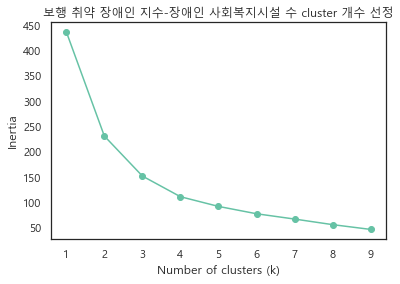

In [28]:
data = disabled_place_scale.values
X=data[:,1:] # 행정동명 제외
num_clusters = list(range(1,10))
inertias = []

# elbow
for i in num_clusters:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)

plt.title('보행 취약 장애인 지수-장애인 사회복지시설 수 cluster 개수 선정')
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

k = 4

Text(0.5, 1.0, '보행 취약 장애인 지수와 서울시내 장애인 관련 사회복지시설수 clustering')

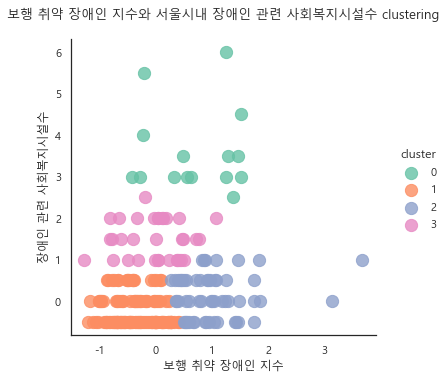

In [29]:
# clustering
kmeans = KMeans(n_clusters=4).fit(X)
kmeans.cluster_centers_
kmeans.labels_
disabled_place_scale['cluster'] = kmeans.labels_

sns.lmplot(x = '보행취약장애인지수',y = '시설수', data = disabled_place_scale, fit_reg=False, scatter_kws={"s":150},hue="cluster")
plt.xlabel('보행 취약 장애인 지수')
plt.ylabel('장애인 관련 사회복지시설수')
plt.title('보행 취약 장애인 지수와 서울시내 장애인 관련 사회복지시설수 clustering', fontsize = 13, pad = 20) # pad : 제목과 그림 사이 간격

상단에 존재하는 cluster 선정이 적절해보임

### 선정 결과

In [30]:
result = disabled_place_scale[disabled_place_scale['cluster']==0]
result

,행정동,보행취약장애인지수,시설수,cluster
4,가양1동,-0.226391,4.0,0
18,공릉2동,0.553687,3.0,0
24,구산동,1.250970,6.0,0
29,길동,1.512290,3.0,0
34,내곡동,-0.280724,3.0,0
65,명일1동,-0.200517,5.5,0
94,상계1동,1.384217,2.5,0
98,상계6.7동,0.489004,3.5,0
105,서교동,-0.420440,3.0,0
116,세곡동,1.292367,3.5,0


In [31]:
result.to_csv("보행취약장애인지수_시설수_clustering.csv",encoding="cp949")